# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras import regularizers


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGO93DL/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGO93DL/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGO93DL/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 81s 186ms/step - loss: 0.6850 - accuracy: 0.6012 - val_loss: 0.4783 - val_accuracy: 0.7961
Epoch 2/10
391/391 [==============================] - 68s 174ms/step - loss: 0.4302 - accuracy: 0.8255 - val_loss: 0.4476 - val_accuracy: 0.8205
Epoch 3/10
391/391 [==============================] - 67s 170ms/step - loss: 0.3808 - accuracy: 0.8482 - val_loss: 0.5067 - val_accuracy: 0.7901
Epoch 4/10
391/391 [==============================] - 66s 168ms/step - loss: 0.4078 - accuracy: 0.8403 - val_loss: 0.4425 - val_accuracy: 0.8250
Epoch 5/10
391/391 [==============================] - 67s 171ms/step - loss: 0.2638 - accuracy: 0.9049 - val_loss: 0.4354 - val_accuracy: 0.8361
Epoch 6/10
391/391 [==============================] - 69s 176ms/step - loss: 0.2219 - accuracy: 0.9247 - val_loss: 0.4686 - val_accuracy: 0.8342
Epoch 7/10
391/391 [==============================] - 67s 171ms/step - loss: 0.2020 - accuracy: 0.9312 - val_loss: 0.4664 - val_ac

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

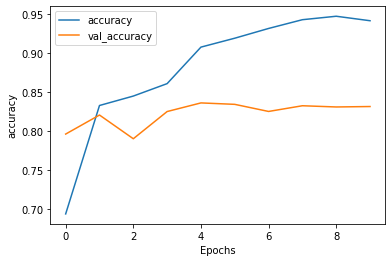

In [10]:
plot_graphs(history, 'accuracy')

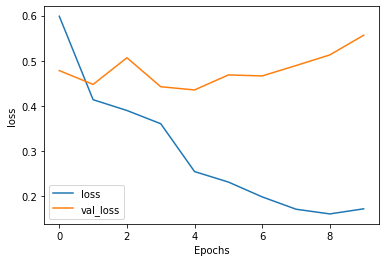

In [11]:
plot_graphs(history, 'loss')

# Multiple Layer LSTM

In [16]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 560,129
Trainable params: 560,129
Non-trainable params: 0
________________________________________________

In [17]:
model_2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

NUM_EPOCHS = 10
history_2 = model_2.fit(train_dataset, 
                    epochs=NUM_EPOCHS, 
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 121s 298ms/step - loss: 0.6623 - accuracy: 0.6319 - val_loss: 0.4729 - val_accuracy: 0.8149
Epoch 2/10
391/391 [==============================] - 117s 299ms/step - loss: 0.3725 - accuracy: 0.8582 - val_loss: 0.4890 - val_accuracy: 0.7900
Epoch 3/10
391/391 [==============================] - 117s 299ms/step - loss: 0.2979 - accuracy: 0.8911 - val_loss: 0.4463 - val_accuracy: 0.8153
Epoch 4/10
391/391 [==============================] - 117s 299ms/step - loss: 0.2342 - accuracy: 0.9158 - val_loss: 0.4913 - val_accuracy: 0.8280
Epoch 5/10
391/391 [==============================] - 117s 297ms/step - loss: 0.1618 - accuracy: 0.9465 - val_loss: 0.5157 - val_accuracy: 0.8250
Epoch 6/10
391/391 [==============================] - 118s 301ms/step - loss: 0.1522 - accuracy: 0.9500 - val_loss: 0.5297 - val_accuracy: 0.8031
Epoch 7/10
391/391 [==============================] - 117s 299ms/step - loss: 0.2327 - accuracy: 0.9105 - val_loss: 0.5573 -

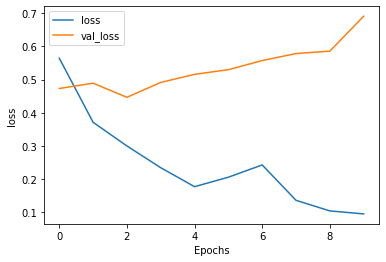

In [18]:
plot_graphs(history_2, 'loss')

# Conv1D 

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.03), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.summary()

In [ ]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history_3 = model_3.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
plot_graphs(history_3, 'accuracy')

In [ ]:
plot_graphs(history_3, 'loss')